In [1]:
category = 'mac_and_cheese'
categories_to_combine = {
    'cheddar': ['sharp cheddar', 'medium cheddar', 'cheddar'],
    'jack': ['jack', 'colby']
    }

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from product_meta_analysis.database.database import Database
from product_meta_analysis.aggregate import reddit as r
from product_meta_analysis.analyze import basic_plots as p

### Get data

In [3]:
db = Database()
annotations = db.read(f"""
    select 
        url_id,
        annotation, 
        annotation_id
    from website_content_annotations 
    where category='{category}'
    """)
annotations = pd.DataFrame(annotations, columns=['url_id', 'annotation', 'annotation_id'])
db.close() 

annotations.head(5)

,url_id,annotation,annotation_id
0,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...,cheddar,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...
1,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...,parmesan,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...
2,427c694669ec9066babdf14186f394d0cbbe892f94f007...,sharp cheddar,427c694669ec9066babdf14186f394d0cbbe892f94f007...
3,427c694669ec9066babdf14186f394d0cbbe892f94f007...,cheddar,427c694669ec9066babdf14186f394d0cbbe892f94f007...
4,427c694669ec9066babdf14186f394d0cbbe892f94f007...,gruyere,427c694669ec9066babdf14186f394d0cbbe892f94f007...


### Number of recipes

In [4]:
annotations['url_id'].nunique()

28

### Count by cheese type

In [5]:
annotation_counts_not_combined = annotations \
    .groupby('annotation') \
    .count() \
    .reset_index()
    
annotation_counts_not_combined

,annotation,url_id,annotation_id
0,american,1,1
1,cheddar,27,27
2,colby,3,3
3,fontina,1,1
4,gruyere,4,4
5,jack,5,5
6,medium cheddar,1,1
7,mozzarella,2,2
8,parmesan,3,3
9,sharp cheddar,18,18


In [6]:
# TODO: move this out to package
def combine_categories(data, categories_to_combine, cat_col='annotation', id_col='url_id'):
    for k, v in categories_to_combine.items():
        data[cat_col] = [k if x in v else x for x in data[cat_col]]
    data = data.drop_duplicates([cat_col, id_col])
    return data

    
annotations_combined = combine_categories(annotations, categories_to_combine)
annotation_counts = annotations_combined \
    .groupby('annotation') \
    .count() \
    .reset_index()
        
annotation_counts

,annotation,url_id,annotation_id
0,american,1,1
1,cheddar,27,27
2,fontina,1,1
3,gruyere,4,4
4,jack,6,6
5,mozzarella,2,2
6,parmesan,3,3
7,swiss,1,1


### Univariate

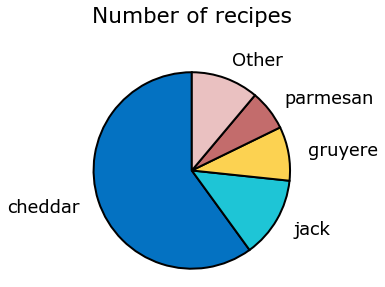

In [7]:
p.create_pie_chart(
    annotation_counts, 
    column='annotation_id', 
    name_column='annotation', 
    count_threshold=3,
    title='Number of recipes'
)

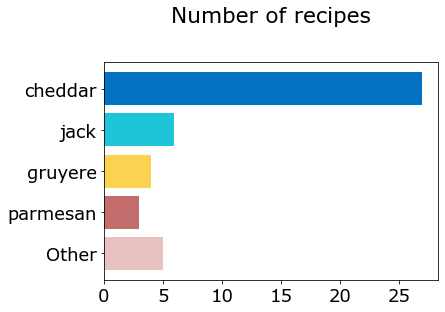

In [11]:
p.create_bar_chart(
    annotation_counts, 
    column='annotation_id', 
    name_column='annotation',
    title = 'Number of recipes',
    count_threshold=3,
)

### Multivariate

In [9]:
n_cheese = annotations_combined \
    .groupby('url_id') \
    .count() \
    .reset_index()

n_cheese_agg = n_cheese \
    .groupby('annotation') \
    .count() \
    .reset_index()

n_cheese_agg

,annotation,url_id,annotation_id
0,1,16,16
1,2,8,8
2,3,3,3
3,4,1,1


In [14]:
n_cheese['annotation'].quantile(0.5)

1.0

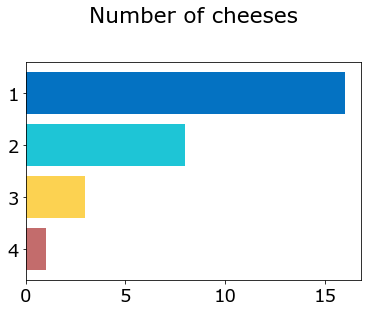

In [10]:
p.create_bar_chart(
    n_cheese_agg, 
    column='annotation_id', 
    name_column='annotation',
    title = 'Number of cheeses',
    count_threshold=None
)



In [15]:
16 / 27

0.5925925925925926